### First project from Kaggle.com - Titanic Survival Prediction

In [1]:
Url = "https://www.kaggle.com/c/titanic/data"

In [2]:
import pandas as pd
from pandas import DataFrame,Series

In [3]:
### Let's laod Our train data 
titanic_df = pd.read_csv("train.csv")

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# To see information obout our data.

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

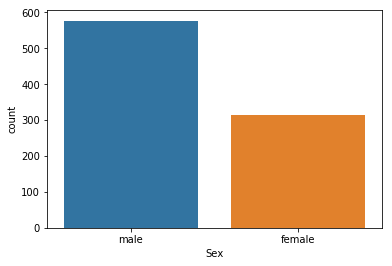

In [10]:
### To see the distribution of sexes in the dataset.

sns.countplot('Sex', data = titanic_df)

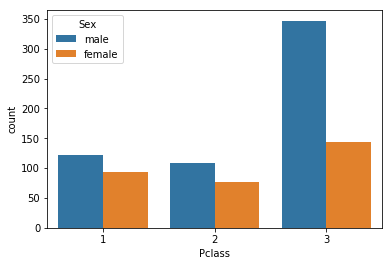

In [11]:
### To see the distribution based on the sexes

sns.countplot('Pclass', data = titanic_df, hue = 'Sex')

In [12]:
### If we think about 'Women and child first' phrase in a matter, we should check if there is any child inside in our dataset.
### So let's define a method for that then apply it to our dataset and add another column named 'Person'.

def male_female_child(passenger):
    age, sex = passenger 
    
    if age < 16:
        return 'child'
    else:
        return sex

In [13]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis = 1)

titanic_df.head(20)     # Let's check first 20 rows.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


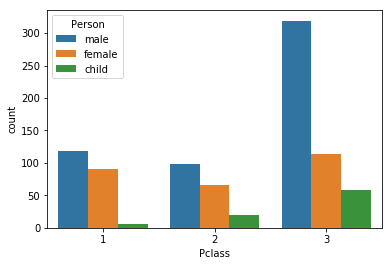

In [14]:
### Let's check the distribution again. Also we can check the age together.


sns.countplot('Pclass', data = titanic_df, hue = 'Person')


Titanic passengers' age mean value: 29.699118
Titanic passengers' count: 891


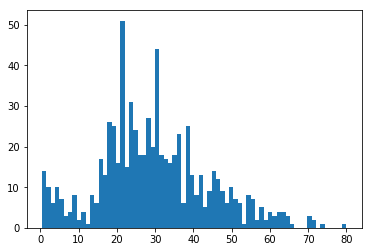

In [15]:
titanic_df['Age'].hist(bins = 70, grid = False)

### Also we can check that mean value of ages and count of people.
print("Titanic passengers' age mean value: %f" %titanic_df['Age'].mean())
print("Titanic passengers' count: %i" %titanic_df['Person'].count())

C:\Users\burak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


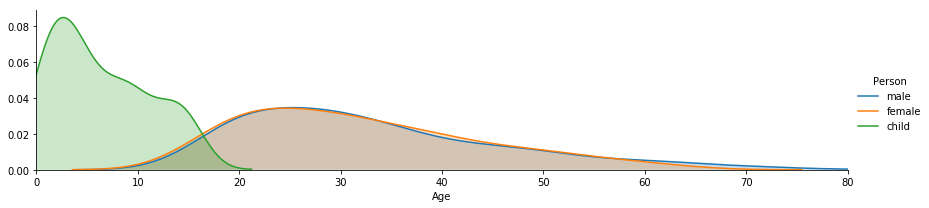

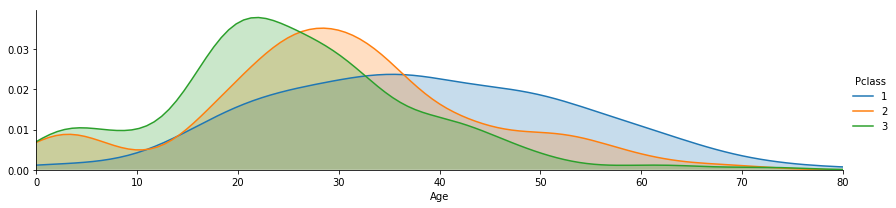

In [16]:
### We can use KDEPlot the see ranges by Person and Pclass.

fig = sns.FacetGrid(data = titanic_df, hue = 'Person', aspect = 4)
fig.map(sns.kdeplot,'Age', shade = True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

fig = sns.FacetGrid(data = titanic_df, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot,'Age', shade = True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

In [17]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [18]:
### As you can see we have a NaN values in cabin attribute. So let's try to deal with them

deck = titanic_df['Cabin'].dropna()
deck.head()    ### First 5 value of deck. The first letters mean the deck level in cabin names!

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

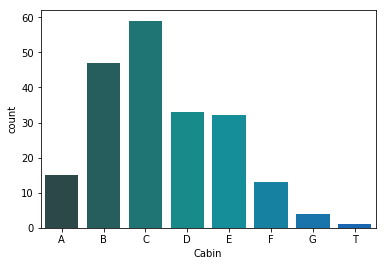

In [19]:
### Created a deck levels list.
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

### Ordered the deck levels in alphebetical form.
order = cabin_df['Cabin'].sort_values().unique()

sns.countplot('Cabin', data = cabin_df, palette = 'winter_d', order = order)

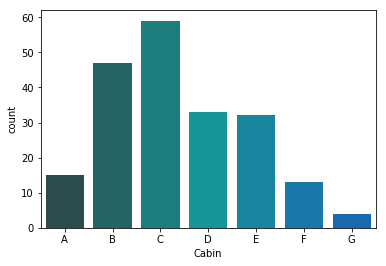

In [20]:
### We got rid of T level.

cabin_df = cabin_df[cabin_df.Cabin != 'T']
order = cabin_df['Cabin'].sort_values().unique()   # Ordered the values again.

sns.countplot('Cabin', data = cabin_df, palette = 'winter_d', order = order)

In [21]:
titanic_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


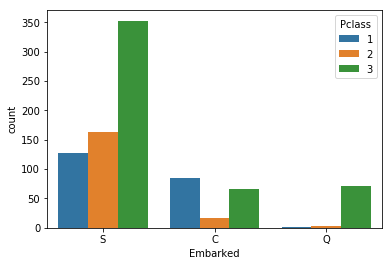

In [22]:
### Let's see the Embarkment location of People by their classes. As we can see that almost every Southampton and Quennstown embarked people were in 3rd class.

sns.countplot('Embarked',data = titanic_df, hue = 'Pclass')

In [23]:
### So let's check who's alone and who was with family?
### In order to do that we created an alone column from siblings and family columns.

titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [24]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

titanic_df.head(15)

C:\Users\burak\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family


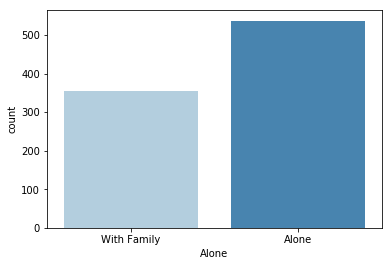

In [25]:
sns.countplot('Alone', data = titanic_df, palette = 'Blues')

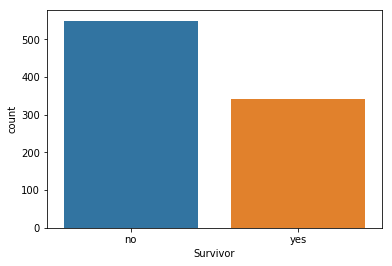

In [26]:
### Now we can check the survivor column and use mapping function to get a categorical answer from the dataframe.
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

### Categorical plot for survival.
sns.countplot('Survivor', data = titanic_df)


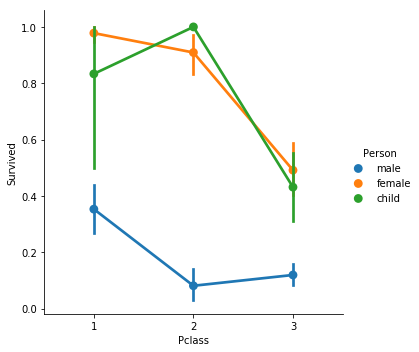

In [29]:
### Let's see if we have any correlation between classes and people type that we have created before.
sns.catplot(x='Pclass',y='Survived', data = titanic_df,kind = 'point', hue = 'Person')

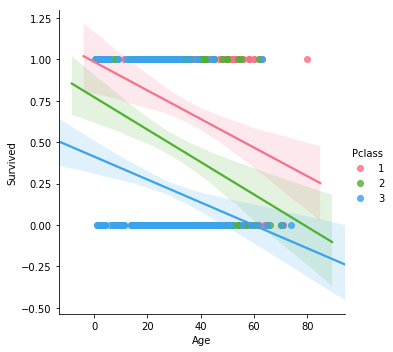

In [32]:
sns.lmplot('Age','Survived',titanic_df,hue ='Pclass',palette = 'husl')

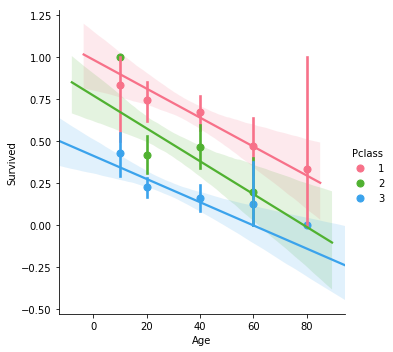

In [40]:
### So let's create a generation bins to see std. We looked at the survival by age bins corresponding to the classes.
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived', hue ='Pclass', data = titanic_df, palette = 'husl',x_bins=generations)

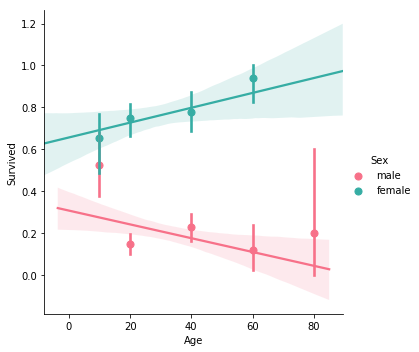

In [36]:
### Then let's look at the same deviation corresponding to sexes.

sns.lmplot('Age','Survived', hue ='Sex', data = titanic_df, palette = 'husl',x_bins=generations)

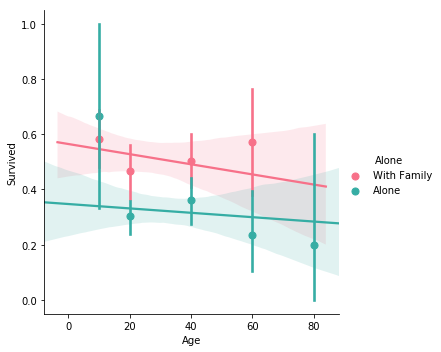

In [46]:
### Then let's look at the same deviation corresponding to being Alone.

sns.lmplot('Age','Survived', hue ='Alone', data = titanic_df, palette = 'husl',x_bins=generations)



C:\Users\burak\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


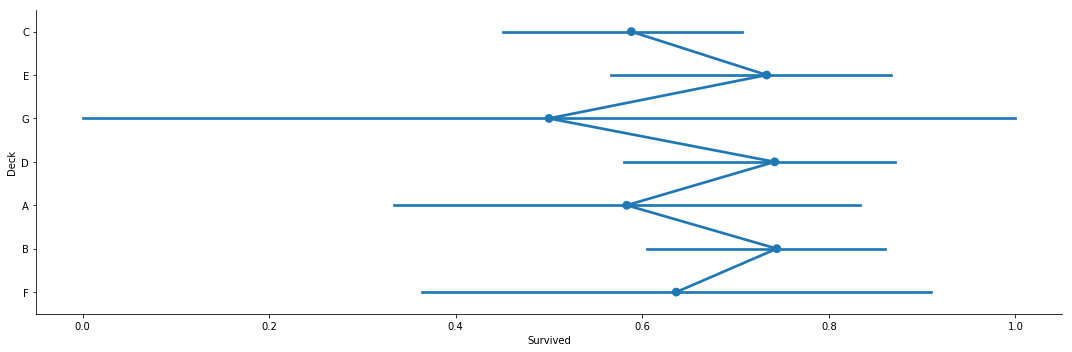

In [166]:

def Deck(Cabin):
    if Cabin[0] == 'A':
        return 'A'
    elif Cabin[0] == 'B':
        return 'B'
    elif Cabin[0] == 'C':
        return 'C'
    elif Cabin[0] == 'D':
        return 'D'
    elif Cabin[0] == 'E':
        return 'E'
    elif Cabin[0] == 'F':
        return 'F'
    elif Cabin[0] == 'G':
        return 'G'
    else:
        return np.NaN

titanic_ndf['Deck'] = titanic_ndf['Cabin'].apply(Deck)
titanic_df['Deck'] = titanic_ndf['Deck']

sns.catplot('Survived', 'Deck', data = titanic_df,aspect = 3,kind = 'point')